In [2]:
import sys
sys.path.append('../src')
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ODE_solver import ode_sistema
from importlib import reload
import ODE_solver


def potencial(y):
    return 0.5*(1 + np.exp(-2*y))**(-2)

def potencial_aproximado(y):
    return 0.5*(1 -2*np.exp(-2*y))

In [9]:
reload(ODE_solver)

<module 'ODE_solver' from 'c:\\Users\\diego\\OneDrive\\Documentos\\Universidad\\Cosmologia\\Efolds\\ODE_solver.py'>

In [3]:
y0, v0 = 1, 0.5
t_span = (0,260000)
sol = solve_ivp(ode_sistema, t_span, [y0, v0], method='RK45', dense_output=True)  # Solución numérica

t = np.linspace(t_span[0],t_span[1], t_span[1]*20)

y, vel = sol.sol(t)[0], sol.sol(t)[1]  # Guardamos la solución numérica para el campo y su derivada.

potencial = 0.5*(1 + np.exp(-2*y))**(-2)  
damping = 3*vel*np.sqrt( potencial  + vel**2)
forcing = np.exp(-2*y) * (1 + np.exp(-2*y))**(-3)
acc = -damping - forcing # Obtenemos la solución numérica para la segunda derivada del campo.

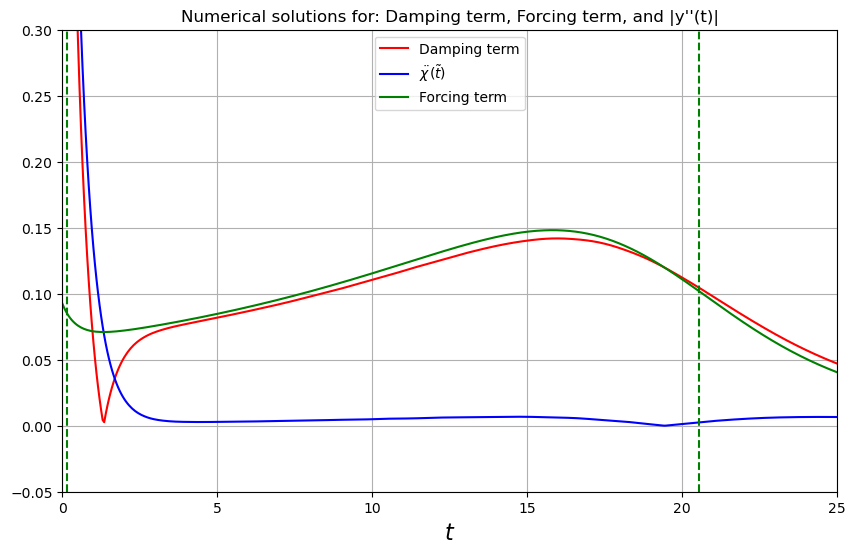

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.abs(damping), 'r-', label="Damping term")
plt.plot(t, np.abs(acc), 'b-', label=r"$\ddot\chi(\tilde{t})$")
plt.plot(t, np.abs(forcing), 'g-', label="Forcing term")
plt.title('Numerical solutions for: Damping term, Forcing term, and |y\'\'(t)|')
plt.axvline(t[idx1], color='green', linestyle='--')
plt.axvline(t[idx2], color='green', linestyle='--')
plt.xlim(0,25)
plt.ylim(-0.05, 0.3)  
plt.legend()
plt.xlabel(r"$t$", fontsize=16)
plt.grid()
plt.show()

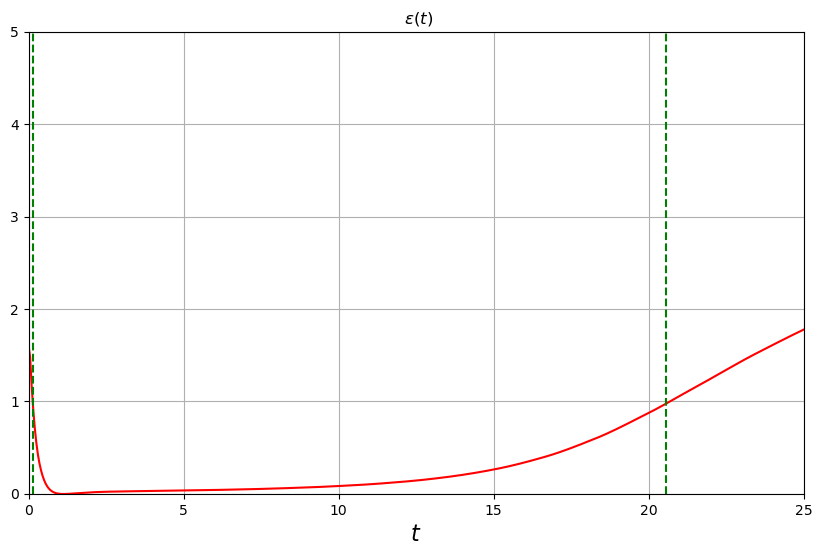

In [32]:
H = np.sqrt(0.5*vel**2 + potencial)/np.sqrt(6) 
dH_dt = np.gradient(H, t) 
epsilon = -dH_dt/H**2

idx1 = np.argmin(epsilon >= 1) 
idx2 = np.argmax(epsilon[idx1:] >= 1)


plt.figure(figsize=(10, 6))
plt.plot(t, epsilon, 'r-', label=r"$\epsilon(\tilde{t})$")
plt.title(r' $\epsilon(t)$')
plt.axvline(t[idx1], color='green', linestyle='--', label=r"$t_{\rm{end}}$")
plt.axvline(t[idx2], color='green', linestyle='--', label=r"$t_{\rm{infl}}$")
plt.xlim(0,25)
plt.ylim(0, 5)
plt.xlabel(r"$t$", fontsize=16)
plt.grid()
plt.show()

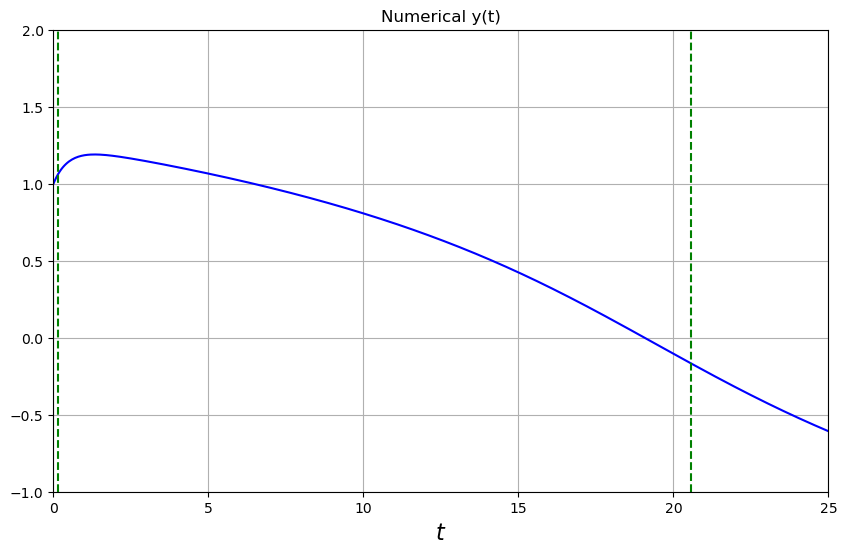

In [36]:

plt.figure(figsize=(10, 6))
plt.plot(t, y, 'b-', label=r"$y(\tilde{t})$")
plt.title('Numerical y(t)')
plt.xlim(0,25)
plt.ylim(-1,2)
plt.axvline(t[idx1], color='green', linestyle='--', label=r"$t_{\rm{end}}$")
plt.axvline(t[idx2], color='green', linestyle='--', label=r"$t_{\rm{infl}}$")
plt.xlabel(r"$t$", fontsize=16)
plt.grid()
plt.show()


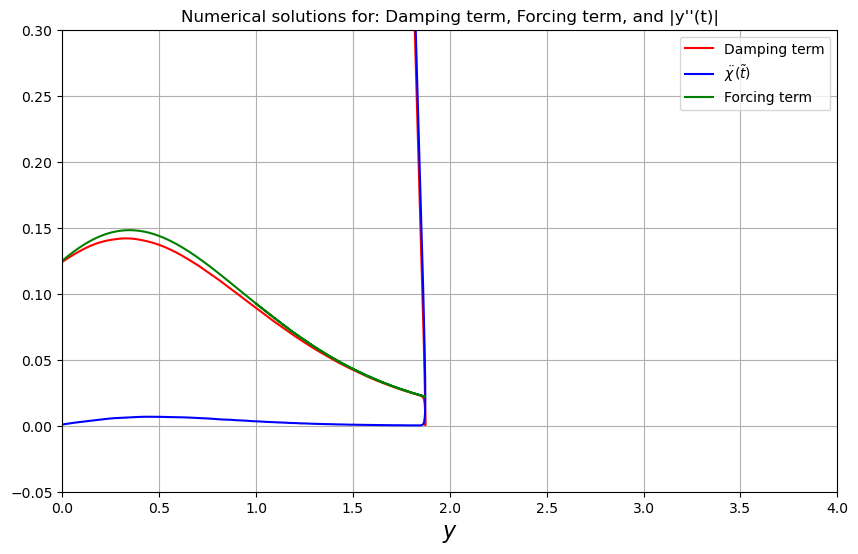

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(y, np.abs(damping), 'r-', label="Damping term")
plt.plot(y, np.abs(acc), 'b-', label=r"$\ddot\chi(\tilde{t})$")
plt.plot(y, np.abs(forcing), 'g-', label="Forcing term")
plt.title('Numerical solutions for: Damping term, Forcing term, and |y\'\'(t)|')
plt.xlim(0,4)
plt.ylim(-0.05, 0.3)  
plt.legend()
plt.xlabel(r"$y$", fontsize=16)
plt.grid()
plt.show()

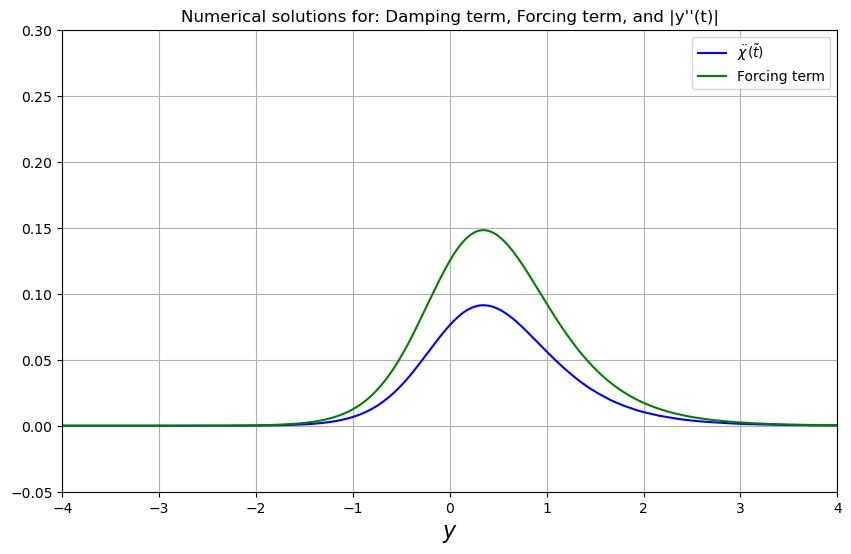

In [14]:
damping = 3*vel*np.sqrt( potencial  + vel**2)
forcing = np.exp(-2*y) * (1 + np.exp(-2*y))**(-3)
acc = -damping - forcing

plt.figure(figsize=(10, 6))
plt.plot(y, np.abs(acc), 'b-', label=r"$\ddot\chi(\tilde{t})$")
plt.plot(y, np.abs(forcing), 'g-', label="Forcing term")
plt.title('Numerical solutions for: Damping term, Forcing term, and |y\'\'(t)|')
plt.xlim(-4,4)
plt.ylim(-0.05, 0.3)  
plt.legend()
plt.xlabel(r"$y$", fontsize=16)
plt.grid()
plt.show()